# # Plotting Every Forward Pass For Sweden

In [2]:
%matplotlib inline 
import numpy as np
import pandas as pd
from mplsoccer import Pitch, Sbopen
import matplotlib.pyplot as plt

In [33]:
parser = Sbopen()
df_game, related ,freeze, tactics = parser.event(69301)

sub_index = df_game.loc[df_game["type_name"] == "Substitution"].loc[df_game["team_name"] == "Sweden Women's"].iloc[0]["index"]

df_sweden = df_game.loc[df_game["type_name"] == "Pass"].loc[df_game["team_name"] == "Sweden Women's"].loc[df_game["index"] < sub_index].loc[df_game["type_name"] != "throw-in"].loc[df_game["outcome_name"].isnull()]
df_sweden = df_sweden[(df_sweden["pass_angle"] < np.pi/2) | (df_sweden["pass_angle"] > 3*np.pi/2)]
df_sweden_pass = df_sweden[['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
print(df_sweden)

# Does the same as above, may look nicer
mask_sweden2 = (df_game.team_name == "Sweden Women's") & (df_game.type_name == "Pass") & (df_game.index < sub_index) & (df_game.outcome_name.isnull()) & (df_game.type_name != "throw-in")
df_swede_pass2 = df_game.loc[mask_sweden2, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
#print(df_swede_pass2)

df_sweden_pass["player_name"] = df_sweden_pass["player_name"].apply(lambda x: str(x).split()[-1])
df_sweden_pass["pass_recipient_name"] = df_sweden_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])


                                       id  ...  foul_committed_card_name
21   b3dd00b7-b5de-4d00-9931-5e5bc5e6323f  ...                       NaN
24   3b66e389-20f6-488f-8def-790498e95faf  ...                       NaN
27   7160ea24-1cdb-4413-a3ea-f8781df83056  ...                       NaN
31   8dda9a83-5f98-47ca-b7f2-4b507bdcece3  ...                       NaN
38   24c5d24c-0a29-4ffd-a80c-c02aff3d5e9f  ...                       NaN
..                                    ...  ...                       ...
660  5b8be34d-7cf4-46b7-a57b-193889230839  ...                       NaN
713  e1b640ca-961b-4920-b156-86759e9aa290  ...                       NaN
766  f4e43f95-92c3-48dc-9b39-db1c6860dcb0  ...                       NaN
769  b95df705-f565-41d7-ab80-536bae9dd31d  ...                       NaN
772  f42cb836-11f3-4f36-b9b5-a78e15eccd9e  ...                       NaN

[77 rows x 73 columns]


/var/folders/2g/rnp9kj753xb99ydtgksqy9kc0000gn/T/ipykernel_42501/134621509.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sweden_pass["player_name"] = df_sweden_pass["player_name"].apply(lambda x: str(x).split()[-1])
/var/folders/2g/rnp9kj753xb99ydtgksqy9kc0000gn/T/ipykernel_42501/134621509.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sweden_pass["pass_recipient_name"] = df_sweden_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])


In [35]:
scatter_df = pd.DataFrame()
for i, name in enumerate(df_sweden_pass["player_name"].unique()):
    passx = df_sweden_pass.loc[df_sweden_pass["player_name"] == name]["x"].to_numpy()
    recx = df_sweden_pass.loc[df_sweden_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy = df_sweden_pass.loc[df_sweden_pass["player_name"] == name]["y"].to_numpy()
    recy = df_sweden_pass.loc[df_sweden_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_df.at[i, "player_name"] = name
    #make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    #calculate number of passes
    scatter_df.at[i, "no"] = df_sweden_pass.loc[df_sweden_pass["player_name"] == name].count().iloc[0]

#adjust the size of a circle so that the player who made more passes
scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)

In [44]:
#counting passes between players
df_sweden_pass["pair_key"] = df_sweden_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
#print(df_pass)
lines_df = df_sweden_pass.groupby(["pair_key"]).x.count().reset_index()
#print(lines_df)
lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
#print(lines_df)
#setting a treshold. You can try to investigate how it changes when you change it.
lines_df = lines_df[lines_df['pass_count']>1]

/var/folders/2g/rnp9kj753xb99ydtgksqy9kc0000gn/T/ipykernel_42501/1878357013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sweden_pass["pair_key"] = df_sweden_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)


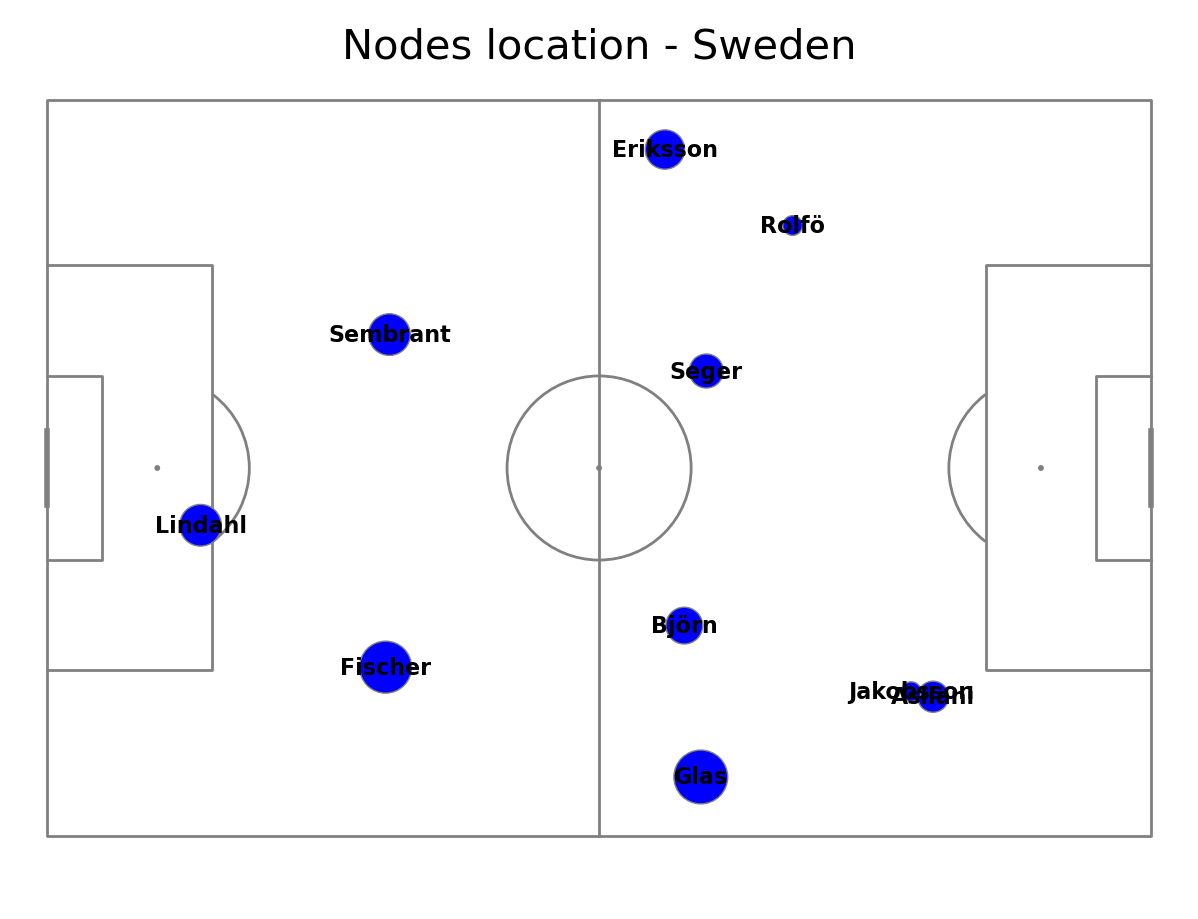

In [41]:
#Drawing pitch
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#Scatter the location on the pitch
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='blue', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
#annotating player name
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

fig.suptitle("Nodes location - Sweden", fontsize = 30)
plt.show()

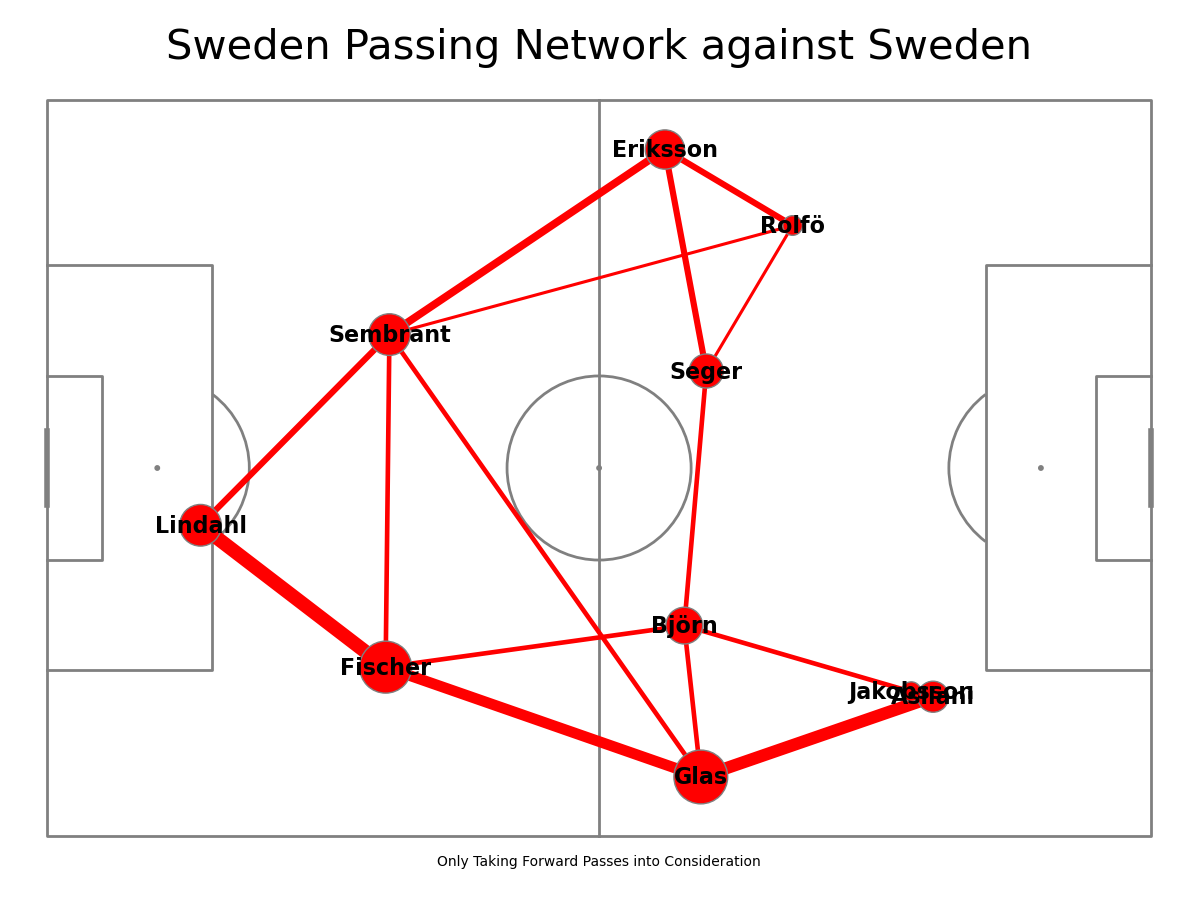

In [54]:
#plot once again pitch and vertices
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

for i, row in lines_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #take the average location of players to plot a line between them
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 10)
        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=1, lw=line_width, zorder=2, color="red", ax = ax["pitch"])

fig.suptitle("Sweden Passing Network against Sweden", fontsize = 30)
plt.title("Only Taking Forward Passes into Consideration", fontsize = 10)
plt.show()